In [1]:
!pip install pandas
!pip install tweepy
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 2.7 MB/s eta 0:00:00


In [2]:
import tweepy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
#My Twitter API Authentication Variables
consumer_key = 'IVoaPof3Dr1S0kPAqSiFg6OcS'
consumer_secret = '6Z1BAwNgTxiuaWG6qlCAc1usdLxifEpPX570ZqgxKLwRSP8SuC'
access_token = '901431977424764929-lfvtFoqhoxcMZbInCzv0jXAMWEKDC1x'
access_token_secret = 'kp0ZB1OebWHivBXNN0r2pevDx17bDZec9fslfTXkfIRju'

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

tweets = api.search_tweets('Citigroup', count=10000)


data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
data['Time'] = [tweet.created_at for tweet in tweets]

display(data.head(1000))

# count the number of rows
num_rows = data.shape[0]

# print the number of rows
print(num_rows)

,Tweets,Time
0,RT @gurgavin: THE WORLDS MOST SHORTED BANK STO...,2023-04-16 08:51:17+00:00
1,"RT @gideonheilpern2: Breaking: Mastercard, Wel...",2023-04-16 08:47:43+00:00
2,RT @BernieSanders: Corporate greed is JP Morga...,2023-04-16 08:44:52+00:00
3,RT @BernieSanders: Corporate greed is JP Morga...,2023-04-16 08:33:58+00:00
4,https://t.co/bleQWwQwdw,2023-04-16 08:23:26+00:00
...,...,...
92,Citigroup beats estimates on higher income fro...,2023-04-15 22:00:31+00:00
93,RT @thejaggins: @BialkoAndrew68 Ladies we have...,2023-04-15 21:55:32+00:00
94,"RT @Hacky007: Bank of America, Citigroup, Blac...",2023-04-15 21:55:11+00:00
95,RT @StockandmoreCom: Bank Of America Charges H...,2023-04-15 21:52:43+00:00


97


In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [6]:
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

,Tweets,Time,polarity
Time,,,
2023-04-16 08:51:17+00:00,RT @gurgavin: THE WORLDS MOST SHORTED BANK STO...,2023-04-16 08:51:17+00:00,0.0000
2023-04-16 08:47:43+00:00,"RT @gideonheilpern2: Breaking: Mastercard, Wel...",2023-04-16 08:47:43+00:00,0.2500
2023-04-16 08:44:52+00:00,RT @BernieSanders: Corporate greed is JP Morga...,2023-04-16 08:44:52+00:00,0.5766
2023-04-16 08:33:58+00:00,RT @BernieSanders: Corporate greed is JP Morga...,2023-04-16 08:33:58+00:00,0.5766
2023-04-16 08:23:26+00:00,https://t.co/bleQWwQwdw,2023-04-16 08:23:26+00:00,0.0000
...,...,...,...
2023-04-15 22:00:31+00:00,Citigroup beats estimates on higher income fro...,2023-04-15 22:00:31+00:00,0.2960
2023-04-15 21:55:32+00:00,RT @thejaggins: @BialkoAndrew68 Ladies we have...,2023-04-15 21:55:32+00:00,0.0258
2023-04-15 21:55:11+00:00,"RT @Hacky007: Bank of America, Citigroup, Blac...",2023-04-15 21:55:11+00:00,0.5106


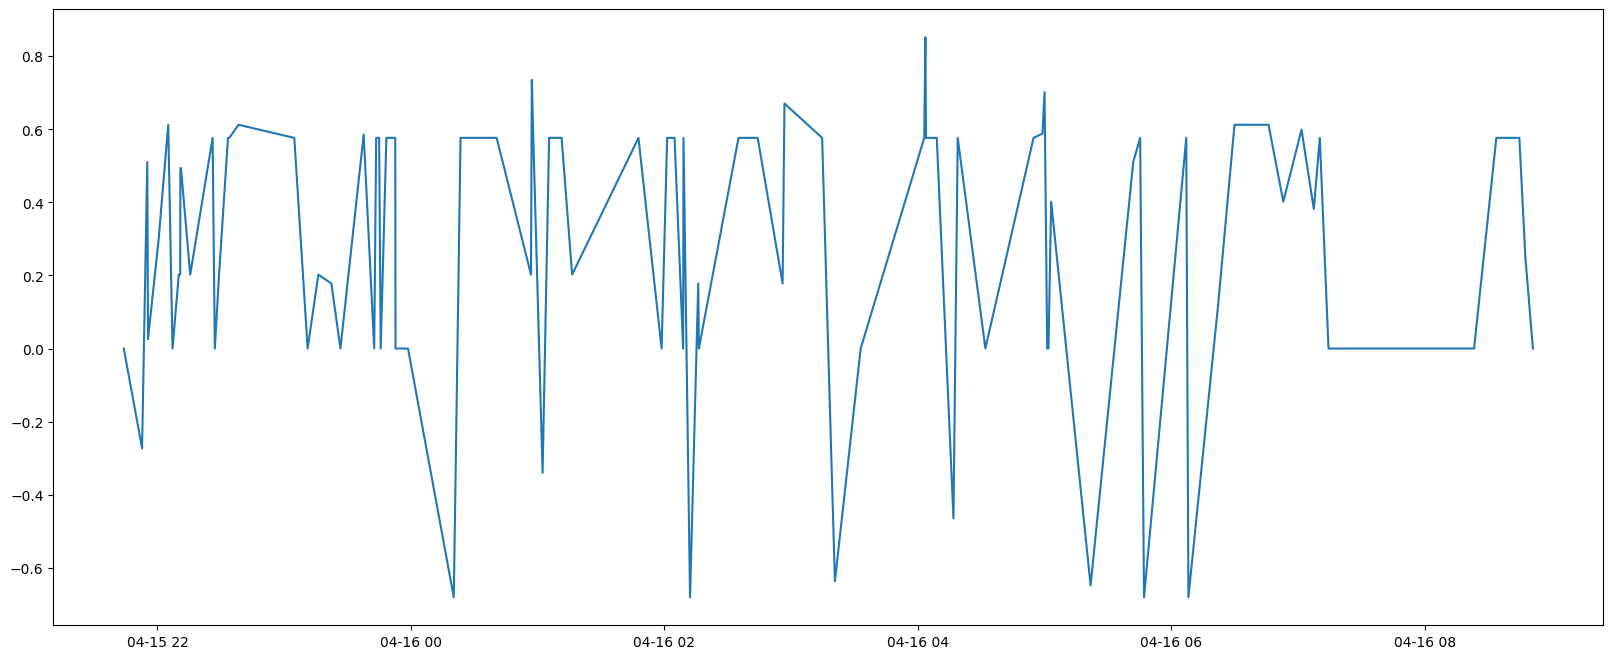

In [7]:
sid = SentimentIntensityAnalyzer()

listy = []

for index, row in data.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  sa = ss['compound']
  listy.append(sa)
  

  
se = pd.Series(listy)
data['polarity'] = se.values

 

#setting index as date
data['Time'] = pd.to_datetime(data.Time,format='%Y-%m-%d')
data.index = data['Time']

display(data.head(187))

#plot
plt.figure(figsize=(20,8))
plt.plot(data['polarity'], label='Sentiment value')


In [8]:
neg = 0
pos = 0
neu = 0
sum = 0
for index, row in data.iterrows():
    sum+= row['polarity']
    if row['polarity']>0 :
     pos+=1
    elif row['polarity']<0 :
     neg+=1
    else :
     neu+=1


x = sum/(pos+neg+neu)
print(x)
print("count of +ve statements :", pos)
print("count of -ve statements :", neg)
print("count of neu statements :", neu)


if sum > 0 :
 print('bull')
else :
 print('bear')

0.29273092783505145
count of +ve statements : 68
count of -ve statements : 9
count of neu statements : 20
bull
